In [5]:
import pandas as pd
df = pd.read_csv('../../datasets/cookie_cats.csv')
df.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
# Counting the number of players in each AB group.
df2 = df.groupby('version').count()
df2.head()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Text(0, 0.5, '...')

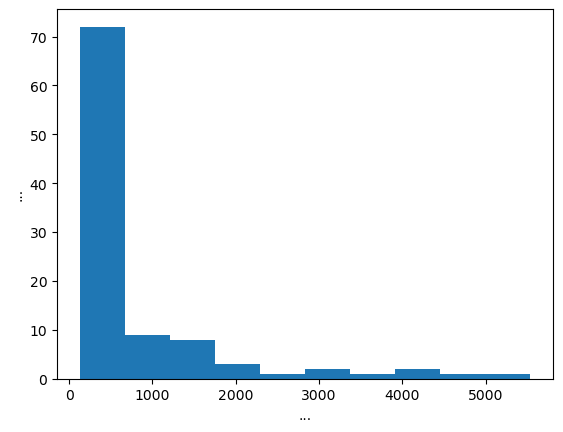

In [7]:
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerouns', y='userid', kind='hist')
ax.set_xlabel("...")
ax.set_ylabel("...")

In [8]:
# The % of users that came back the day after they installed
proportion = df['retention_1'].sum() / df['retention_1'].count()
proportion

0.4452095044850259

In [9]:
# Calculating 1-day retention for each AB-group
proportion_ver = df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count()
proportion_ver

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<Axes: ylabel='Density'>

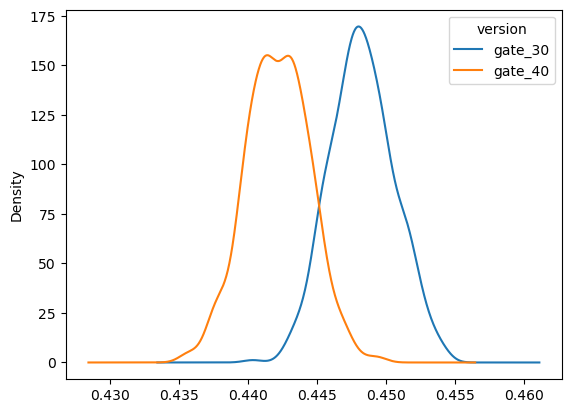

In [10]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='kde')

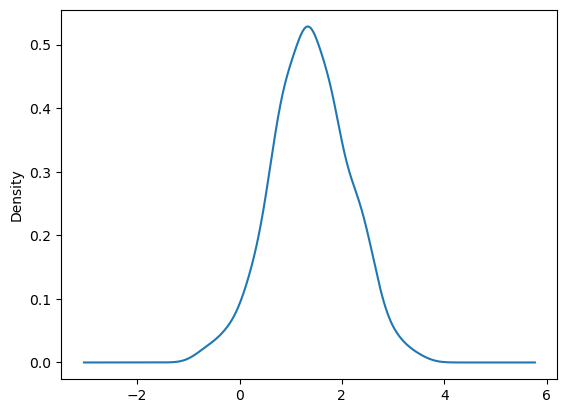

In [11]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (
        (boot_1d['gate_30'] - boot_1d['gate_40'] ) / boot_1d['gate_40'] *100
    )

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='kde')

In [12]:
# Calculating 7-day retention for both AB-groups
prop = df.groupby('version')['retention_7'].mean()
prop

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

0.998

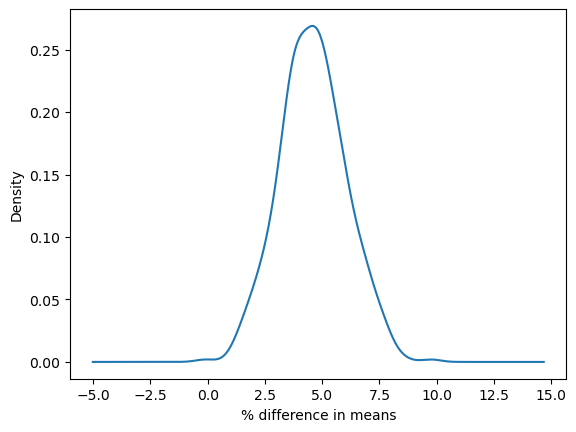

In [13]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (
    (boot_7d['gate_30'] - boot_7d['gate_40'] ) / boot_7d['gate_40'] *100
)

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0.0).mean()

# Pretty printing the probability
prob